In [3]:
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 初始化SparkSession
from pyspark.sql.types import IntegerType, FloatType, DoubleType
from webencodings import labels
spark = SparkSession.builder.appName("PesticidesAnalysis").getOrCreate()

pesticides_path = "./data/pesticides.csv"
pesticides = spark.read.csv(pesticides_path, header=True, inferSchema=True)

pesticides.printSchema()

pesticides.show(5)

summary = pesticides.describe()
summary.show()



rainfall_path = "./data/rainfall.csv"
rainfall = spark.read.csv(rainfall_path, header=True, inferSchema=True)
rainfall.printSchema()

rainfall.show(5)

summary = rainfall.describe()
summary.show()


temp_path = "./data/temp.csv"
temp = spark.read.csv(temp_path, header=True, inferSchema=True)
temp.printSchema()

temp.show(5)

summary = temp.describe()
summary.show()


yield_path = "./data/yield.csv"
yields = spark.read.csv(yield_path, header=True, inferSchema=True)
yields.printSchema()

yields.show(5)

summary = yields.describe()
summary.show()




root
 |-- Domain: string (nullable = true)
 |-- Area: string (nullable = true)
 |-- Element: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Value: double (nullable = true)

+--------------+-------+-------+------------------+----+--------------------+-----+
|        Domain|   Area|Element|              Item|Year|                Unit|Value|
+--------------+-------+-------+------------------+----+--------------------+-----+
|Pesticides Use|Albania|    Use|Pesticides (total)|1990|tonnes of active ...|121.0|
|Pesticides Use|Albania|    Use|Pesticides (total)|1991|tonnes of active ...|121.0|
|Pesticides Use|Albania|    Use|Pesticides (total)|1992|tonnes of active ...|121.0|
|Pesticides Use|Albania|    Use|Pesticides (total)|1993|tonnes of active ...|121.0|
|Pesticides Use|Albania|    Use|Pesticides (total)|1994|tonnes of active ...|201.0|
+--------------+-------+-------+------------------+----+-------

+-------+-----------+------+------------------+-----------+------------+-------+------------------+-------+-----------------+-----------------+-----+-----------------+
|summary|Domain Code|Domain|         Area Code|       Area|Element Code|Element|         Item Code|   Item|        Year Code|             Year| Unit|            Value|
+-------+-----------+------+------------------+-----------+------------+-------+------------------+-------+-----------------+-----------------+-----+-----------------+
|  count|      56717| 56717|             56717|      56717|       56717|  56717|             56717|  56717|            56717|            56717|56717|            56717|
|   mean|       null|  null|125.65042227198195|       null|      5419.0|   null|111.61165082779414|   null|1989.669569970203|1989.669569970203| null|62094.66008427808|
| stddev|       null|  null| 75.12019495452651|       null|         0.0|   null|101.27843534146328|   null|16.13319773965858|16.13319773965858| null|67835.93285

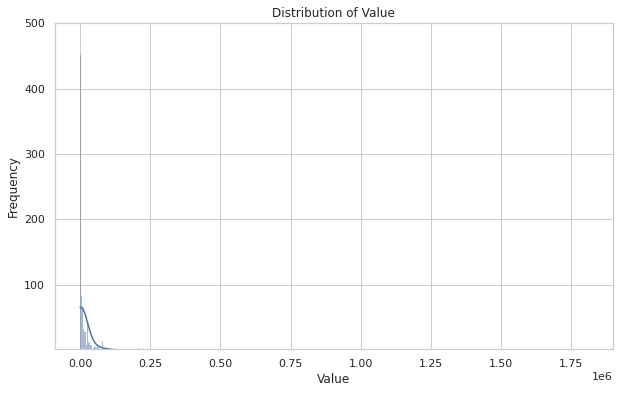

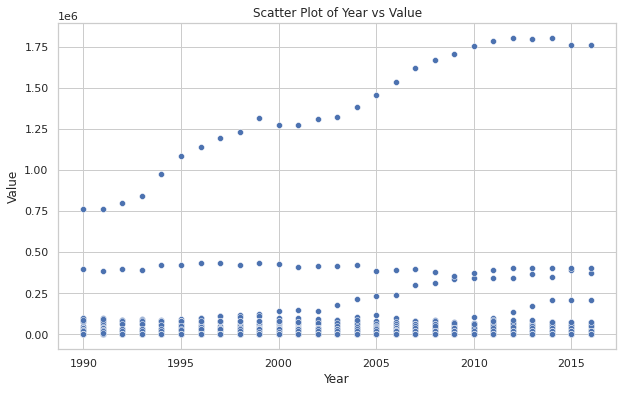

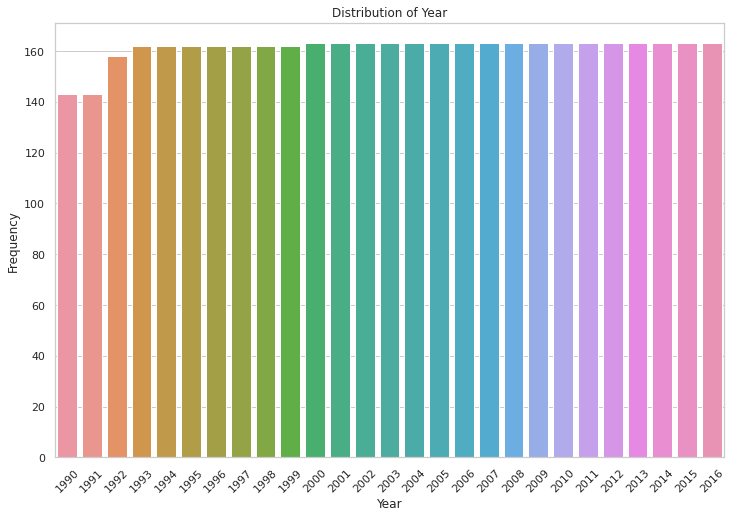

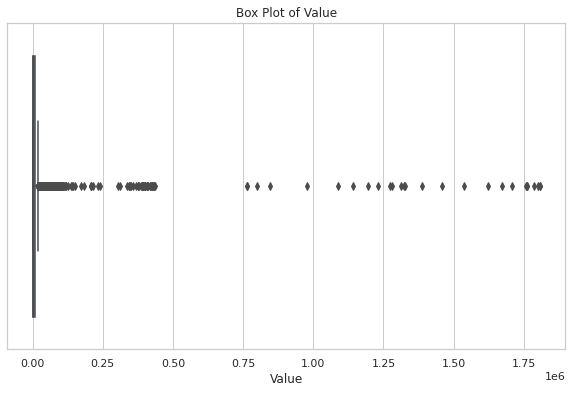

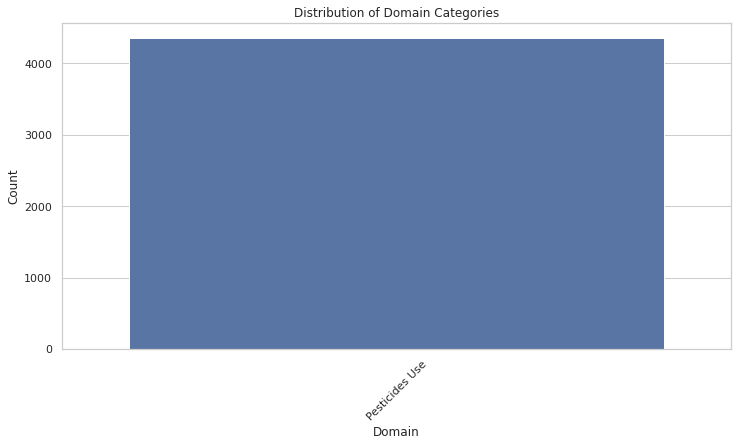

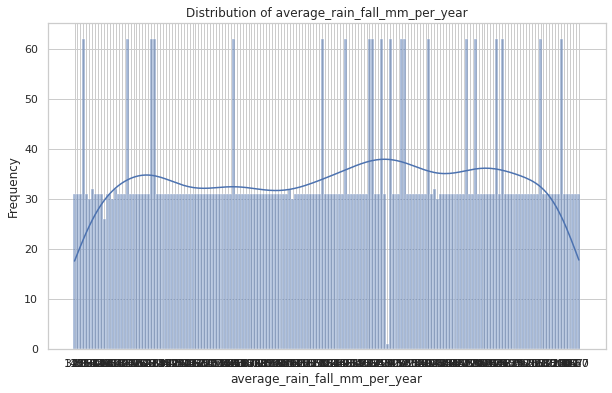

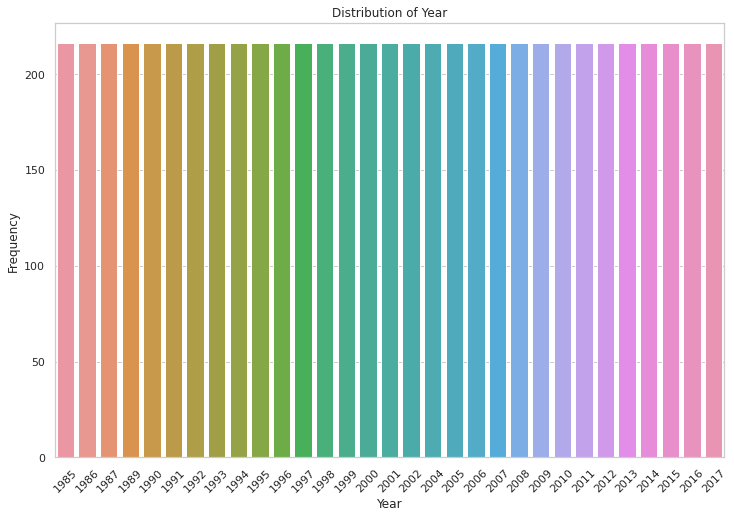

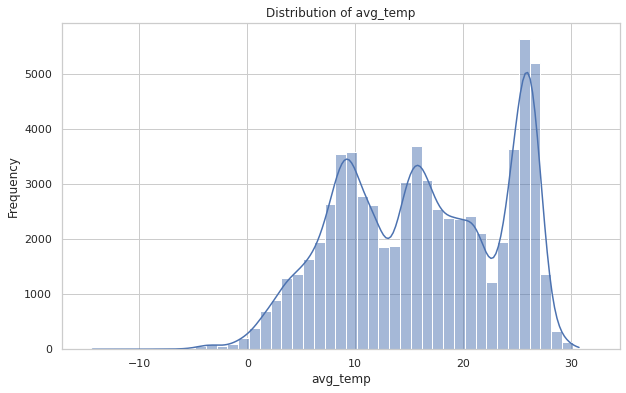

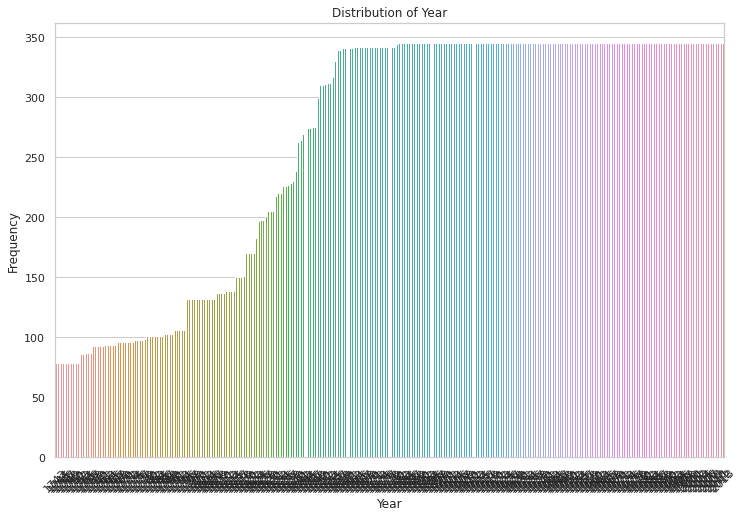

AnalysisException: cannot resolve 'avg_temp' given input columns: [Area, Area Code, Domain, Domain Code, Element, Element Code, Item, Item Code, Unit, Value, Year, Year Code];
'Project ['avg_temp]
+- Relation [Domain Code#3616,Domain#3617,Area Code#3618,Area#3619,Element Code#3620,Element#3621,Item Code#3622,Item#3623,Year Code#3624,Year#3625,Unit#3626,Value#3627] csv


In [4]:

# pesticides
# 从Spark DataFrame提取数据列到NumPy数组
values = np.array(pesticides.select(col('Value')).rdd.flatMap(lambda x: x).collect())
Year = np.array(pesticides.select(col('Year')).rdd.flatMap(lambda x: x).collect())
Domain = np.array(pesticides.select(col('Domain')).rdd.flatMap(lambda x: x).collect())

# 设置风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制直方图
sns.histplot(values, kde=True)  # 使用对数刻度和更多的分箱

# 设置标题和标签
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 设置x轴的限制，根据你的数据调整这些值
plt.ylim([1, 500])

# 增加网格线
plt.grid(True)

# 显示图形
plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(x=Year, y=values)
plt.title('Scatter Plot of Year vs Value')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()


# 设置风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12, 8))

# 绘制条形图
ax = sns.countplot(x=Year)

# 设置标题和标签
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# 优化x轴标签显示
plt.xticks(rotation=45)  # 如果年份标签重叠，可以旋转标签

# 显示图形
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x=values)
plt.title('Box Plot of Value')
plt.xlabel('Value')
plt.show()


plt.figure(figsize=(12, 6))
sns.countplot(x=Domain)
plt.title('Distribution of Domain Categories')
plt.xlabel('Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)  # 如果标签太长，可旋转以便更好的显示
plt.show()

# rainfall
average_rain_fall_mm_per_year = np.array(rainfall.select(col('average_rain_fall_mm_per_year')).rdd.flatMap(lambda x: x).collect())
Year = np.array(rainfall.select(col('Year')).rdd.flatMap(lambda x: x).collect())
# 设置风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制直方图，对数刻度，调整bin大小
sns.histplot(average_rain_fall_mm_per_year, kde=True)  # 使用对数刻度和更多的分箱

# 设置标题和标签
plt.title('Distribution of average_rain_fall_mm_per_year')
plt.xlabel('average_rain_fall_mm_per_year')
plt.ylabel('Frequency')

# 设置x轴的限制，根据你的数据调整这些值
# plt.ylim([1, 500])

# 增加网格线
plt.grid(True)

# 显示图形
plt.show()


# 设置风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12, 8))

# 绘制条形图
ax = sns.countplot(x=Year)

# 设置标题和标签
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# 优化x轴标签显示
plt.xticks(rotation=45)  # 如果年份标签重叠，可以旋转标签

# 显示图形
plt.show()

# temp
Year = np.array(temp.select(col('year')).rdd.flatMap(lambda x: x).collect())
avg_temp = np.array(temp.select(col('avg_temp')).rdd.flatMap(lambda x: x).collect())

# 设置风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制直方图，对数刻度，调整bin大小
sns.histplot(avg_temp, kde=True)  # 使用对数刻度和更多的分箱

# 设置标题和标签
plt.title('Distribution of avg_temp')
plt.xlabel('avg_temp')
plt.ylabel('Frequency')

# 设置x轴的限制，根据你的数据调整这些值
# plt.ylim([1, 500])

# 增加网格线
plt.grid(True)

# 显示图形
plt.show()



# 设置风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12, 8))

# 绘制条形图
ax = sns.countplot(x=Year)

# 设置标题和标签
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# 优化x轴标签显示
plt.xticks(rotation=45)  # 如果年份标签重叠，可以旋转标签

# 显示图形
plt.show()

# yields
Value = np.array(yields.select(col('Value')).rdd.flatMap(lambda x: x).collect())
avg_temp = np.array(yields.select(col('avg_temp')).rdd.flatMap(lambda x: x).collect())
Year = np.array(yields.select(col('Year')).rdd.flatMap(lambda x: x).collect())

# 设置风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(10, 6))

# 绘制直方图，对数刻度，调整bin大小
sns.histplot(Value, kde=True)  # 使用对数刻度和更多的分箱

# 设置标题和标签
plt.title('Distribution of Value')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 设置x轴的限制，根据你的数据调整这些值
# plt.ylim([1, 500])

# 增加网格线
plt.grid(True)

# 显示图形
plt.show()


# 设置风格
sns.set(style="whitegrid")

# 创建图形
plt.figure(figsize=(12, 8))

# 绘制条形图
ax = sns.countplot(x=Year)

# 设置标题和标签
plt.title('Distribution of Year')
plt.xlabel('Year')
plt.ylabel('Frequency')

# 优化x轴标签显示
plt.xticks(rotation=45)  # 如果年份标签重叠，可以旋转标签

# 显示图形
plt.show()



In [8]:
from pyspark.sql.functions import col, when, mean as _mean, stddev as _stddev, abs as _abs

def z_score(df, column):
    # 计算均值和标准差
    stats = df.select(
        _mean(col(column)).alias('mean'),
        _stddev(col(column)).alias('stddev')
    ).collect()[0]

    mean = stats['mean']
    std = stats['stddev']

    # 计算Z-score并标记异常值
    df = df.withColumn('Z_score', _abs((col(column) - mean) / std))
    df = df.withColumn('is_outlier', when(col('Z_score') > 3, 1).otherwise(0))

    # 统计异常值的数量
    outlier_count = df.filter(col('is_outlier') == 1).count()

    return outlier_count


def describes(df):
    print(df.printSchema())

    # 打印DataFrame的描述性统计信息
    print(df.describe().show())


    # 打印DataFrame的行数和列数
    num_rows = df.count()
    num_cols = len(df.columns)
    print(f"DataFrame shape: ({num_rows}, {num_cols})")

    # 打印每列的缺失值数量
    print(df.select([_mean(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show())


describes(pesticides)
# 打印结果
print("Detected outliers using Z-score:", z_score(pesticides, 'Value'))
# 打印数据的基本信息



describes(rainfall)
print('average_rain_fall_mm_per_year ', "Detected outliers using Z-score:", z_score(rainfall, 'average_rain_fall_mm_per_year'))

describes(temp)
print("Detected outliers using Z-score:", z_score(temp, 'avg_temp'))


describes(yields)
print("Detected outliers using Z-score:", z_score(yields, 'Value'))

root
 |-- Domain: string (nullable = true)
 |-- Area: string (nullable = true)
 |-- Element: string (nullable = true)
 |-- Item: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Unit: string (nullable = true)
 |-- Value: double (nullable = true)

None
+-------+--------------+--------+-------+------------------+------------------+--------------------+------------------+
|summary|        Domain|    Area|Element|              Item|              Year|                Unit|             Value|
+-------+--------------+--------+-------+------------------+------------------+--------------------+------------------+
|  count|          4349|    4349|   4349|              4349|              4349|                4349|              4349|
|   mean|          null|    null|   null|              null|2003.1388825017245|                null|20303.341464704514|
| stddev|          null|    null|   null|              null| 7.728043577553066|                null|117736.19044755606|
|    min|P

+-------+-----------+------+------------------+-----------+------------+-------+------------------+-------+-----------------+-----------------+-----+-----------------+
|summary|Domain Code|Domain|         Area Code|       Area|Element Code|Element|         Item Code|   Item|        Year Code|             Year| Unit|            Value|
+-------+-----------+------+------------------+-----------+------------+-------+------------------+-------+-----------------+-----------------+-----+-----------------+
|  count|      56717| 56717|             56717|      56717|       56717|  56717|             56717|  56717|            56717|            56717|56717|            56717|
|   mean|       null|  null|125.65042227198195|       null|      5419.0|   null|111.61165082779414|   null|1989.669569970203|1989.669569970203| null|62094.66008427808|
| stddev|       null|  null| 75.12019495452651|       null|         0.0|   null|101.27843534146328|   null|16.13319773965858|16.13319773965858| null|67835.93285